# Handwritten Digit Classification


For this Hands-on, we will use the popular scikit-learn library to build a basic classifier. The MNIST dataset contains images of handwritten digits, and the task is to classify each image into its corresponding digit (0 to 9).

## Import Libraries

In [18]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

## Load the Dataset

**Question 1:** Load the train and test subsets of the mnist dataset from Keras

In [19]:
import tensorflow as tf

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) =tf.keras.datasets.mnist.load_data()
#(X_train, y_train), (X_test, y_test) = mnist.load_data()


## Data Pre-Processing

**Question 2:**  

*   Adjust the input shape to match the one the model is expecting
*   Normalize the values of the pixels
*   Turn labels into categories using the to_categorical function

In [20]:
# Preprocess the data

X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)) / 255.0
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)) / 255.0
print(X_train.shape)
print(X_test.shape)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


(60000, 28, 28, 1)
(10000, 28, 28, 1)


#### As we can see, the data is split into two parts, from 70,000 images approximately 80% into training data(60,000) and 20% into testing data(10,000). The size of the images is 28x28

## Build and train a CNN

**Question 3:** Create a Convolutional neural Network of your choice and be carefyl while you select the following:


*   input shape
*   activation function at the output layer
*   number of output neurons



In [21]:
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


# Build the CNN model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()



Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 5408)              0         
                                                                 
 dense_3 (Dense)             (None, 100)               540900    
                                                                 
 dense_4 (Dense)             (None, 10)                1010      
                                                                 
Total params: 542230 (2.07 MB)
Trainable params: 542230 (2.07 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

Question 4: Compile and train the model. Choose an appropriate loss function, optimizer, and print out the accuracy of the model.

In [22]:
# Compile the model

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model

history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 39s 24ms/step - loss: 0.1781 - accuracy: 0.9466 - val_loss: 0.0760 - val_accuracy: 0.9781
Epoch 2/5
1500/1500 [==============================] - 36s 24ms/step - loss: 0.0605 - accuracy: 0.9818 - val_loss: 0.0572 - val_accuracy: 0.9842
Epoch 3/5
1500/1500 [==============================] - 36s 24ms/step - loss: 0.0399 - accuracy: 0.9881 - val_loss: 0.0641 - val_accuracy: 0.9815
Epoch 4/5
1500/1500 [==============================] - 36s 24ms/step - loss: 0.0270 - accuracy: 0.9913 - val_loss: 0.0591 - val_accuracy: 0.9842
Epoch 5/5
1500/1500 [==============================] - 35s 23ms/step - loss: 0.0198 - accuracy: 0.9934 - val_loss: 0.0558 - val_accuracy: 0.9851


## Evaluate the Model's performance

**Question 5:** Plot the training and validation accuracy to better understand the performance of the model.

After training the model successfully,we are using the testing dataset to test the accuracy of the model.

313/313 [==============================] - 1s 4ms/step - loss: 0.0529 - accuracy: 0.9847
Test Accuracy: 0.9847000241279602


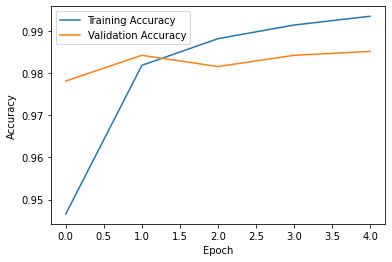

In [25]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_accuracy)

# Plot the training and validation accuracy over epochs

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
